In [37]:
import tensorflow as tf


In [54]:
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [40]:
train_images.shape

(50000, 32, 32, 3)

In [41]:
test_images.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
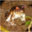

In [42]:
train_images[0]

In [43]:
import matplotlib.pyplot as plt


In [44]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Reshaping


In [45]:
train_labels = train_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [46]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [47]:
classes[3]

'cat'

In [48]:
def sample_plot(X ,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


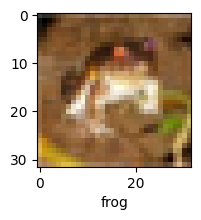

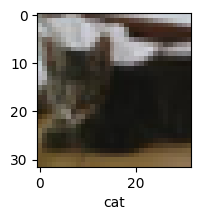

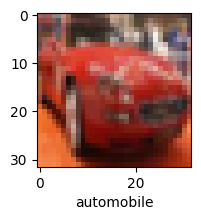

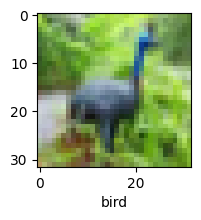

In [49]:
sample_plot(train_images,train_labels,0)
sample_plot(train_images,train_labels,9)
sample_plot(train_images,train_labels,5)
sample_plot(train_images,train_labels,6)

Normalization

In [50]:
train_images = train_images/255.0
test_images = test_images/255.0

In [58]:
model = models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),

     # dense layers
    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [60]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3590 - loss: 1.7530
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.5741 - loss: 1.2058
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.6296 - loss: 1.0682
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.6631 - loss: 0.9699
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.6817 - loss: 0.9116
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7045 - loss: 0.8391
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7240 - loss: 0.7895
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.7338 - loss: 0.7552
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.7533 - loss: 0.7070
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.7611 - loss: 0.6778


In [61]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6819 - loss: 0.9525


[0.9508721828460693, 0.6800000071525574]

In [64]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [65]:
test_labels = test_labels.reshape(-1,)
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

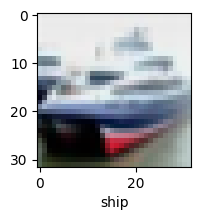

In [66]:
sample_plot(test_images,test_labels,1)


In [69]:
y_pred = model.predict(test_images)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[3.3177592e-02, 2.9867290e-02, 2.2431244e-01, 9.8558593e-01,
        3.9396513e-02, 9.5142913e-01, 4.4257188e-01, 8.8787768e-03,
        4.4180661e-01, 1.2170513e-02],
       [9.5984590e-01, 9.2239213e-01, 8.4926270e-02, 2.2272320e-02,
        2.3855879e-03, 5.8963639e-04, 7.9590082e-04, 8.2424149e-06,
        9.9993151e-01, 2.8171542e-01],
       [8.3642906e-01, 8.9922202e-01, 1.5979908e-01, 1.7069671e-01,
        1.1000748e-01, 5.9121004e-03, 1.0405357e-02, 2.1163696e-02,
        9.0666968e-01, 5.5584478e-01],
       [9.2838663e-01, 2.7881017e-01, 3.7330461e-01, 6.2444836e-02,
        4.5478576e-01, 2.0198172e-03, 1.5195943e-03, 1.9656294e-03,
        5.0933492e-01, 2.9643667e-03],
       [1.7338034e-04, 6.4057726e-03, 9.1881454e-01, 9.8749363e-01,
        9.9574065e-01, 9.5408076e-01, 9.8890245e-01, 7.8358250e-03,
        1.5790714e-02, 2.0890716e-04]], dtype=float32)

In [70]:
import numpy as np


In [72]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [73]:
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

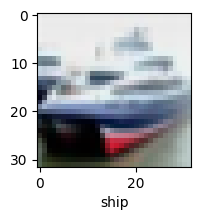

In [75]:
sample_plot(test_images,test_labels,1)

In [77]:
classes[y_classes[1]]

'ship'

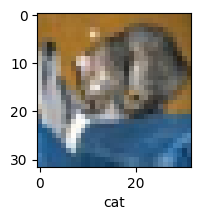

In [78]:
sample_plot(test_images,test_labels,0)

In [79]:
classes[y_classes[0]]

'cat'

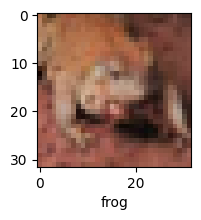

In [81]:
sample_plot(test_images,test_labels,5)

In [82]:
classes[y_classes[5]]

'frog'

In [84]:
from sklearn.metrics import classification_report


In [88]:

report = classification_report(test_labels, y_classes)

print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.84      0.79      0.81      1000
           2       0.53      0.60      0.57      1000
           3       0.48      0.46      0.47      1000
           4       0.61      0.66      0.64      1000
           5       0.50      0.68      0.58      1000
           6       0.80      0.69      0.74      1000
           7       0.83      0.66      0.74      1000
           8       0.76      0.84      0.80      1000
           9       0.83      0.72      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

